In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('updated_augmented_dataset_medical.csv')

In [3]:
data.head(10)

,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Outcome Variable,Cold,Dizziness,Body Pain,Headache,Days Ill
0,No,No,Yes,No,Normal,Negative,Yes,Yes,Yes,Yes,13
1,No,Yes,Yes,Yes,Normal,Negative,Yes,No,No,Yes,16
2,Yes,No,Yes,No,High,Negative,No,Yes,Yes,No,22
3,Yes,No,Yes,No,High,Negative,No,Yes,No,No,1
4,Yes,Yes,Yes,Yes,Normal,Positive,Yes,Yes,Yes,Yes,4
5,No,No,Yes,No,High,Negative,No,No,Yes,No,28
6,No,No,Yes,No,High,Negative,Yes,No,Yes,No,4
7,No,No,Yes,No,Normal,Negative,Yes,No,No,No,8
8,Yes,No,Yes,Yes,High,Negative,No,Yes,Yes,No,10
9,Yes,No,Yes,No,Normal,Positive,No,Yes,No,Yes,20


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Fever                 1002 non-null   object
 1   Cough                 1002 non-null   object
 2   Fatigue               1002 non-null   object
 3   Difficulty Breathing  1002 non-null   object
 4   Blood Pressure        1002 non-null   object
 5   Outcome Variable      1002 non-null   object
 6   Cold                  1002 non-null   object
 7   Dizziness             1002 non-null   object
 8   Body Pain             1002 non-null   object
 9   Headache              1002 non-null   object
 10  Days Ill              1002 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 86.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [6]:

# Instantiate LabelEncoder
label_encoders = {}
columns_to_encode = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure','Outcome Variable', 'Cold', 'Dizziness', 'Body Pain', 'Headache','Days Ill']

# Apply LabelEncoder to each column
for column in columns_to_encode:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save the encoder for future use if needed


In [7]:
data.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Outcome Variable,Cold,Dizziness,Body Pain,Headache,Days Ill
0,0,0,1,0,2,0,1,1,1,1,12
1,0,1,1,1,2,0,1,0,0,1,15
2,1,0,1,0,0,0,0,1,1,0,21
3,1,0,1,0,0,0,0,1,0,0,0
4,1,1,1,1,2,1,1,1,1,1,3


In [8]:
import matplotlib.pyplot as plt


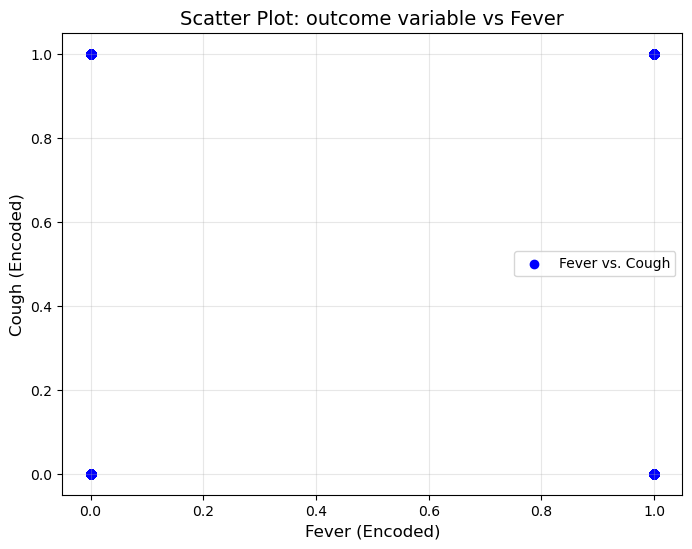

In [9]:

plt.figure(figsize=(8, 6))
plt.scatter(data['Outcome Variable'], data['Fever'], color='blue', label='Fever vs. Cough')
plt.title('Scatter Plot: outcome variable vs Fever', fontsize=14)
plt.xlabel('Fever (Encoded)', fontsize=12)
plt.ylabel('Cough (Encoded)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

In [10]:
data = data.rename(columns={'Days Ill': 'days'})


In [11]:

# Correct way to define X (features) and y (target)
X = data[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure', 
'Cold', 'Dizziness', 'Body Pain', 'Headache','days']]
y = data['Outcome Variable']

In [12]:
data.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Outcome Variable,Cold,Dizziness,Body Pain,Headache,days
0,0,0,1,0,2,0,1,1,1,1,12
1,0,1,1,1,2,0,1,0,0,1,15
2,1,0,1,0,0,0,0,1,1,0,21
3,1,0,1,0,0,0,0,1,0,0,0
4,1,1,1,1,2,1,1,1,1,1,3


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
print(f"Number of rows: {X.shape[0]}, Number of columns: {X.shape[1]}")


Number of rows: 1002, Number of columns: 10


In [15]:
print(y.value_counts())


Outcome Variable
0    501
1    501
Name: count, dtype: int64


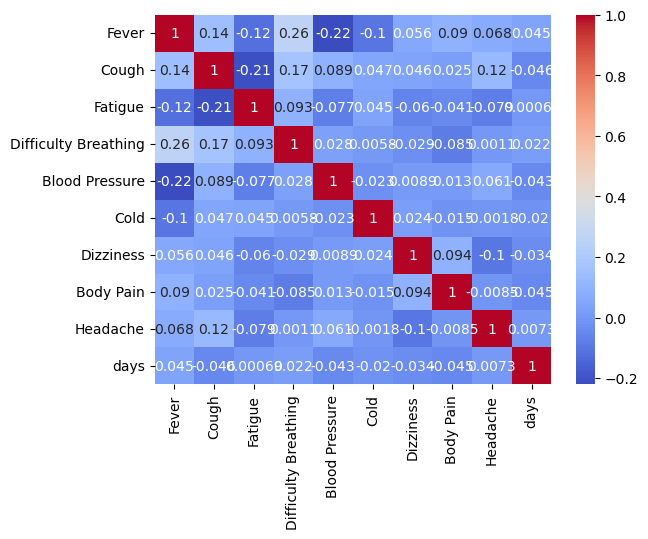

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
correlation_matrix = pd.DataFrame(X).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [19]:
data.head()

,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Outcome Variable,Cold,Dizziness,Body Pain,Headache,days
0,0,0,1,0,2,0,1,1,1,1,12
1,0,1,1,1,2,0,1,0,0,1,15
2,1,0,1,0,0,0,0,1,1,0,21
3,1,0,1,0,0,0,0,1,0,0,0
4,1,1,1,1,2,1,1,1,1,1,3


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Step 1: Preprocess
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Handle imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 5: Evaluate
accuracy = rf_model.score(X_test, y_test)
print("Random Forest Accuracy:", accuracy)

# Step 6: Cross-validation
cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())


Random Forest Accuracy: 0.8109452736318408
Cross-Validation Accuracy: 0.810412935323383


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assuming you have a trained RandomForest model (rf_model)
# Define the feature names that will be input
features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Blood Pressure',
            'Cold', 'Dizziness', 'Body Pain', 'Headache','days']

# Function to predict outcome based on user input
def predict_outcome(fever, cough, fatigue, difficulty_breathing, blood_pressure,
                    cold, dizziness, body_pain, headache,days):
    # Create a DataFrame for the input values
    input_data = pd.DataFrame([[fever, cough, fatigue, difficulty_breathing, blood_pressure,cold, dizziness, body_pain, headache,days]], columns=features)
    
    # Make prediction using the trained model
    prediction = rf_model.predict(input_data)
    
    # Return the prediction
    return prediction[0]

# Function to get user input
def get_user_input():
    print("Enter the following values (0 or 1):\n")
    fever = int(input("Do you have a fever? "))
    cough = int(input("Do you have a cough? "))
    fatigue = int(input("Are you feeling fatigued? "))
    difficulty_breathing = int(input("Are you experiencing difficulty breathing? "))
    blood_pressure = int(input("Do you have blood pressure issues? "))
    cold = int(input("Are you feeling cold? "))
    dizziness = int(input("Are you feeling dizzy? "))
    body_pain = int(input("Do you have body pain? "))
    headache = int(input("Do you have a headache? "))
    days=int(input("For how many days have you had symptoms? "))
    
    
    # Make prediction
    outcome = predict_outcome(fever, cough, fatigue, difficulty_breathing, blood_pressure,
                          cold, dizziness, body_pain, headache, days)
    print(f"\nPredicted Outcome Variable: {outcome}")

# Main function
if __name__ == "__main__":
    get_user_input()


Enter the following values (0 or 1):


Predicted Outcome Variable: 1


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [27]:
import pickle

# Assuming you have trained a model, e.g., using scikit-learn
# model = your_trained_model

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

print("Model saved successfully!")


Model saved successfully!


In [28]:
with open('model.pkl', 'rb') as file:
    print(file.read(10))  # Read the first 10 bytes


b'\x80\x04\x95\xb4\x13\x01\x00\x00\x00\x00'
